# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sqlalchemy import create_engine



# !pip install mysql-connector-python
import mysql.connector
import getpass



# Challenge 0 - Import a MySQL table into python:

In this lab, we will twist things up a little. Do you remember your good old friend SQL?
Well, it's time to bring him back and use it in our lab pipeline.

1º- Open the wholesale_customers_data.sql file in MySQL Workbench and run the script into a desired schema.

2º- Create a connection using sqlalchemy from python to mysql and load the table into a variable called *customers*

In [20]:
import getpass

saved_password = getpass.getpass()



········


In [12]:
import mysql.connector
from sqlalchemy import create_engine

cnx = mysql.connector.connect(
    user = 'root', 
    password = saved_password, 
    database = 'wholesales', 
    port=3306
)

In [21]:
cnx.is_connected()
if cnx.is_connected():
    print("Connection open")
    # do stuff you need to the database
else:
    print("Connection is not successfully open")

Connection open


In [26]:
engine = create_engine('mysql+mysqlconnector://root:' + saved_password + '@localhost/wholesales')

In [51]:
sql_query = "SELECT * FROM wholesale_customers_data"
customers = pd.read_sql_query(sql_query,engine)
customers.head()




,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


# Challenge 1 - Describe the Dataset

Your already loaded dataset contains information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

In case of curiosity, the origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [46]:
customers.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1320 entries, 0 to 1319
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           1320 non-null   int64
 1   Region            1320 non-null   int64
 2   Fresh             1320 non-null   int64
 3   Milk              1320 non-null   int64
 4   Grocery           1320 non-null   int64
 5   Frozen            1320 non-null   int64
 6   Detergents_Paper  1320 non-null   int64
 7   Delicassen        1320 non-null   int64
dtypes: int64(8)
memory usage: 82.6 KB


In [47]:
customers.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [ ]:
# Any categorical data to convert?
# Any missing data to remove?

"""There are no categorical data or missing data that needs to be transformed"""

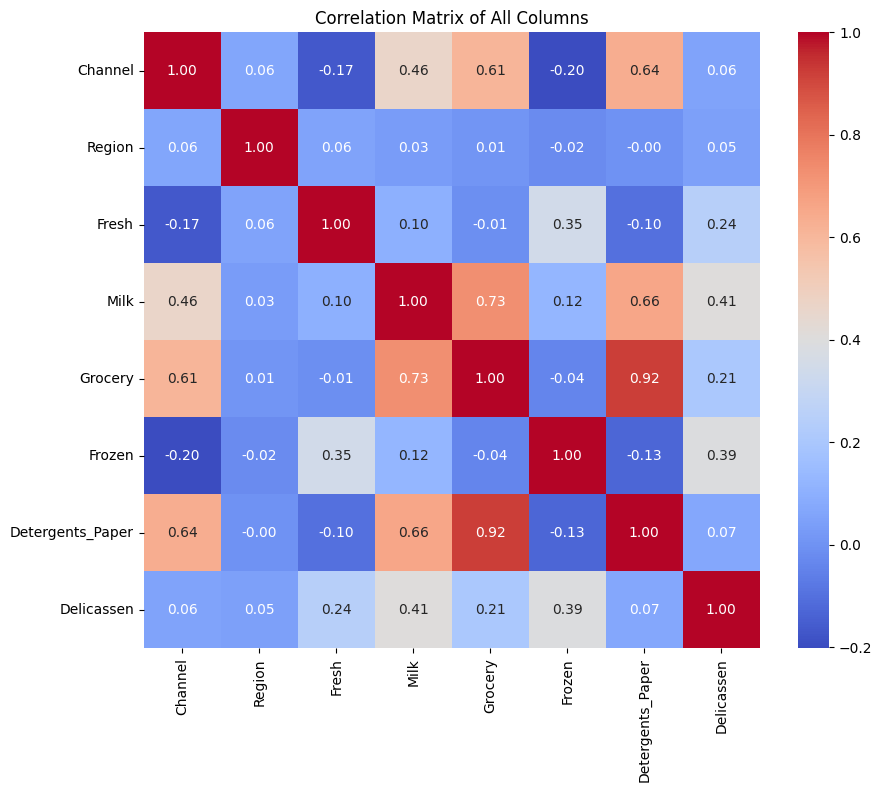

In [30]:

# Column collinearity - any high correlations?
# Descriptive statistics - any outliers to remove?
# Column-wise data distribution - is the distribution skewed?

correlation_matrix = customers.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of All Columns')
plt.show()


In [ ]:
# Column collinearity - any high correlations?

""" There is a strong positive linear relation between 'Grocery' and 'Detergents_Paper'.  This suggests that 
these two variables might be related in some ways. It could be that when customers spend more on groceries 
the spending on detergents and paper products also tends to increase. Or they might purchase these products 
together. """

In [48]:
# Descriptive statistics - any outliers to remove?

customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000,1320.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.467697,0.773685,12637.736654,7374.779618,9495.955272,4850.991365,4764.238327,2817.967063
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


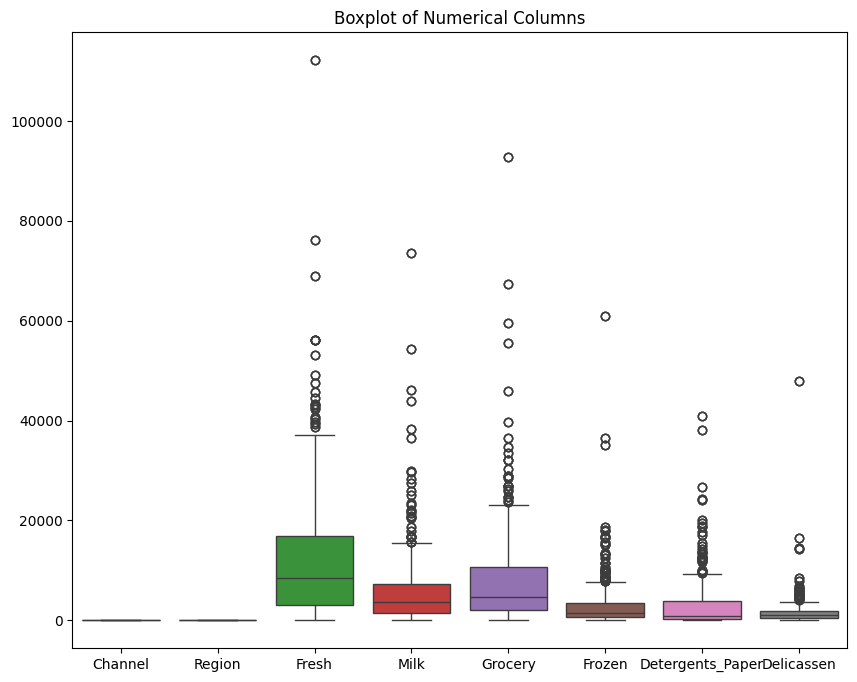

In [46]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=customers)
plt.title('Boxplot of Numerical Columns')
plt.show()

In [ ]:

""" In columns "Fresh," "Milk," "Grocery," "Frozen," "Detergents_Paper," 
and "Delicassen," the maximum values are significantly higher than 
the 75th percentile.This suggests that there are some outliers."""



In [ ]:
# Column-wise data distribution - is the distribution skewed?

""""There are significant different between the mean and the median values.
The distribution of these values are likely positively skewed. 
The high-value outliers pulling the man upwards""

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [ ]:
"""Due to outliers we should transform the data to spread out the 
values and make the distribution more symmetrical and reduce the 
impact of outliers"""


# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [ ]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:


In [53]:

column_names = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

scaler = StandardScaler()

if set(column_names).issubset(customers.columns):
    customers[column_names] = scaler.fit_transform(customers[column_names])
    print("Data scaled successfully.")
else:
    print("Specified columns not found in the DataFrame.")


Data scaled successfully.


In [54]:
print(customers_scaled)


      Channel  Region     Fresh      Milk   Grocery    Frozen  \
0           2       3  0.052933  0.523568 -0.041115 -0.589367   
1           2       3 -0.391302  0.544458  0.170318 -0.270136   
2           2       3 -0.447029  0.408538 -0.028157 -0.137536   
3           1       3  0.100111 -0.624020 -0.392977  0.687144   
4           2       3  0.840239 -0.052396 -0.079356  0.173859   
...       ...     ...       ...       ...       ...       ...   
1315        1       3  1.401312  0.848446  0.850760  2.075222   
1316        1       3  2.155293 -0.592142 -0.757165  0.296561   
1317        2       3  0.200326  1.314671  2.348386 -0.543380   
1318        1       3 -0.135384 -0.517536 -0.602514 -0.419441   
1319        1       3 -0.729307 -0.555924 -0.573227 -0.620094   

      Detergents_Paper  Delicassen  
0            -0.043569   -0.066339  
1             0.086407    0.089151  
2             0.133232    2.243293  
3            -0.498588    0.093411  
4            -0.231918    1.299347

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [81]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
kmeans.fit(customers_scaled)

cluster_labels = kmeans.labels_
customers['labels'] = cluster_labels


Count the values in `labels`.

In [82]:

label_counts = customers['labels'].value_counts()
print(label_counts)


labels
0    951
1    333
2     36
Name: count, dtype: int64


# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [75]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5)
dbscan.fit(customers_scaled)
dbscan_labels = dbscan.labels_

customers['labels_DBSCAN'] = dbscan_labels


Count the values in `labels_DBSCAN`.

In [76]:

label_counts_DBSCAN = customers['labels_DBSCAN'].value_counts()

print(label_counts_DBSCAN)


labels_DBSCAN
-1     561
 2     396
 16     66
 4      63
 26     24
 18     18
 0      18
 7      15
 3      15
 24     12
 6       9
 25      9
 23      9
 22      9
 19      9
 13      9
 1       9
 10      9
 15      6
 14      6
 17      6
 12      6
 20      6
 21      6
 11      6
 9       6
 8       6
 5       6
Name: count, dtype: int64


# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

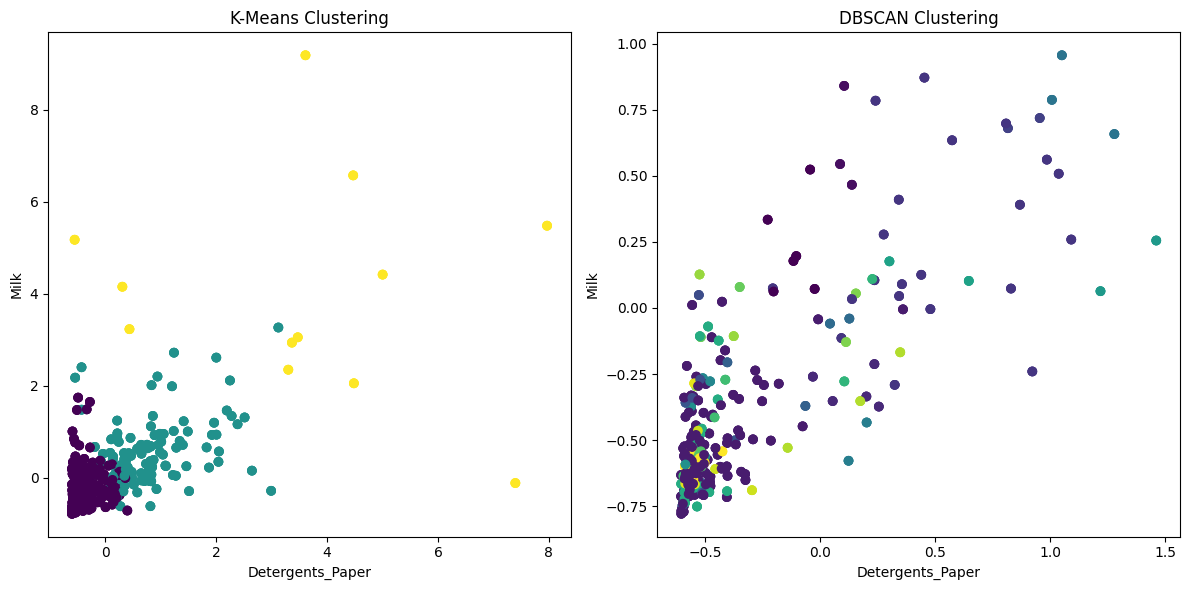

In [83]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


# plot K-Means labels
ax1.scatter(customers[customers['labels'] != -1]['Detergents_Paper'], 
            customers[customers['labels'] != -1]['Milk'], 
            c=customers[customers['labels'] != -1]['labels'])
ax1.set_xlabel('Detergents_Paper')
ax1.set_ylabel('Milk')
ax1.set_title('K-Means Clustering')



# plot DBSCAN labels
ax2.scatter(customers[customers['labels_DBSCAN'] != -1]['Detergents_Paper'], 
            customers[customers['labels_DBSCAN'] != -1]['Milk'], 
            c=customers[customers['labels_DBSCAN'] != -1]['labels_DBSCAN'], cmap='viridis')
ax2.set_xlabel('Detergents_Paper')
ax2.set_ylabel('Milk')
ax2.set_title('DBSCAN Clustering')


plt.tight_layout()
plt.show()


Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

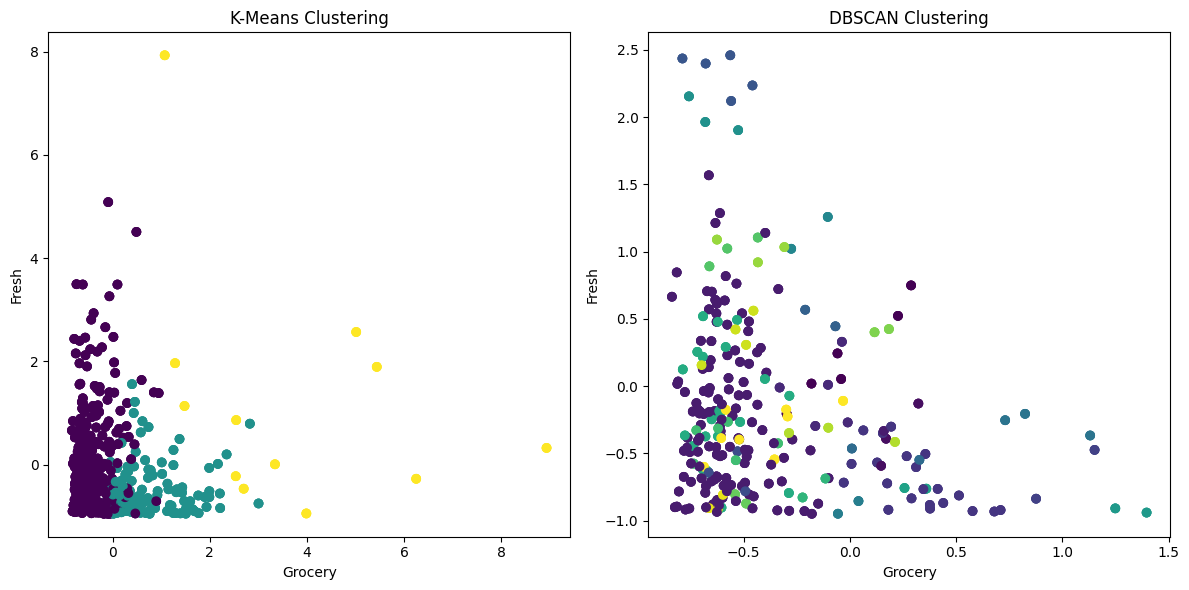

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


# plot K-Means labels
ax1.scatter(customers[customers['labels'] != -1]['Grocery'], 
            customers[customers['labels'] != -1]['Fresh'], 
            c=customers[customers['labels'] != -1]['labels'])
ax1.set_xlabel('Grocery')
ax1.set_ylabel('Fresh')
ax1.set_title('K-Means Clustering')



# plot DBSCAN labels
ax2.scatter(customers[customers['labels_DBSCAN'] != -1]['Grocery'], 
            customers[customers['labels_DBSCAN'] != -1]['Fresh'], 
            c=customers[customers['labels_DBSCAN'] != -1]['labels_DBSCAN'], cmap='viridis')
ax2.set_xlabel('Grocery')
ax2.set_ylabel('Fresh')
ax2.set_title('DBSCAN Clustering')


plt.tight_layout()
plt.show()


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

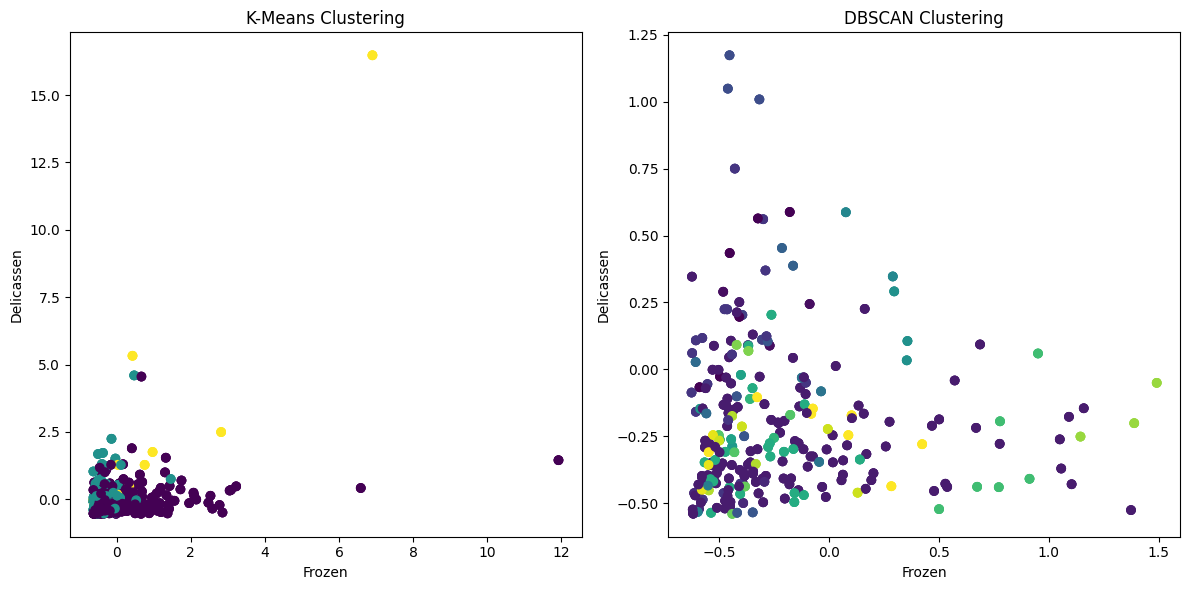

In [86]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


# plot K-Means labels
ax1.scatter(customers[customers['labels'] != -1]['Frozen'], 
            customers[customers['labels'] != -1]['Delicassen'], 
            c=customers[customers['labels'] != -1]['labels'])
ax1.set_xlabel('Frozen')
ax1.set_ylabel('Delicassen')
ax1.set_title('K-Means Clustering')



# plot DBSCAN labels
ax2.scatter(customers[customers['labels_DBSCAN'] != -1]['Frozen'], 
            customers[customers['labels_DBSCAN'] != -1]['Delicassen'], 
            c=customers[customers['labels_DBSCAN'] != -1]['labels_DBSCAN'], cmap='viridis')
ax2.set_xlabel('Frozen')
ax2.set_ylabel('Delicassen')
ax2.set_title('DBSCAN Clustering')


plt.tight_layout()
plt.show()


Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [96]:
                                     
                                       
means_kmeans = customers.drop(columns=['labels_DBSCAN']).groupby('labels').mean()
print("means_kmeans:",means_kmeans)


means_kmeans:          Channel    Region     Fresh      Milk   Grocery    Frozen  \
labels                                                               
0       1.091483  2.523659  0.115569 -0.358154 -0.428173  0.084960   
1       1.927928  2.594595 -0.463347  0.585782  0.820936 -0.334596   
2       1.833333  2.583333  1.233009  4.042758  3.717242  0.850661   

        Detergents_Paper  Delicassen  
labels                                
0              -0.429894   -0.116556  
1               0.838108    0.068040  
2               3.603866    2.449666  


In [93]:
means_dbscan = customers.groupby('labels_DBSCAN').mean()
print("means_dbscan",means_dbscan)




means_dbscan                 Channel    Region     Fresh      Milk   Grocery    Frozen  \
labels_DBSCAN                                                               
-1             1.497326  2.417112  0.225587  0.498042  0.521846  0.282174   
 0             2.000000  3.000000  0.230353  0.227718 -0.010599 -0.407961   
 1             2.000000  3.000000 -0.371169  0.616939  0.213090 -0.279966   
 2             1.000000  3.000000 -0.233380 -0.530972 -0.578252 -0.184857   
 3             2.000000  3.000000 -0.047439 -0.306575 -0.128764 -0.484978   
 4             2.000000  3.000000 -0.702073  0.251922  0.311033 -0.467009   
 5             2.000000  3.000000 -0.656007  0.699301  1.013734 -0.349738   
 6             1.000000  3.000000 -0.636296 -0.187276 -0.561814 -0.410092   
 7             1.000000  3.000000  2.330913 -0.593472 -0.609298 -0.370277   
 8             1.000000  3.000000  0.506549 -0.288086 -0.139141 -0.188885   
 9             1.000000  3.000000 -0.506556 -0.049751  0.168159

Which algorithm appears to perform better?

In [ ]:
"""DBSCAN performs better. This method can handle irregular shapes 
and varing desities and outliers better than K-mean."""

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [98]:
()



()

In [ ]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here